#타겟 발굴 시나리오

SEIHWAN 2025

#04: 실험적 검증 계획 수립 실습

Target Validation Planning Exercise

Generated Target Candidate Data:
  Target_ID Gene_Name  Predictive_Score  Druggability_Score
0    TRG001      EGFR          0.724507            0.315050
1    TRG002    PIK3CA          0.629260            0.491123
2    TRG003      BRAF          0.747153            0.622185
3    TRG004      PTEN          0.878454            0.369801
4    TRG005      AKT1          0.614877            0.675140

Target Priority Assessment Results:
  Target_ID Gene_Name  Confidence_Score  Efficiency_Score  Innovation_Score  \
0    TRG001      EGFR          0.485725          0.582857               0.1   
1    TRG002    PIK3CA          0.599456          0.770909               0.7   
2    TRG003      BRAF          0.696530          0.425974               0.3   
3    TRG004      PTEN          0.511409          0.717403               0.5   
4    TRG005      AKT1          0.688829          0.740779               0.3   

   Priority_Score Priority_Grade  
0        0.437720      

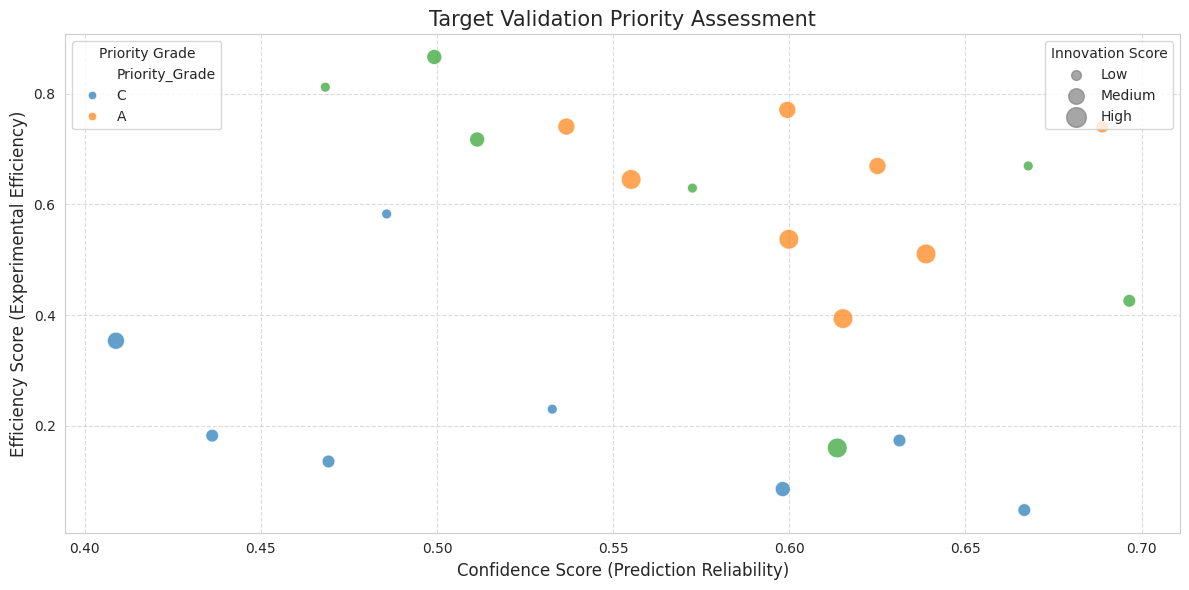

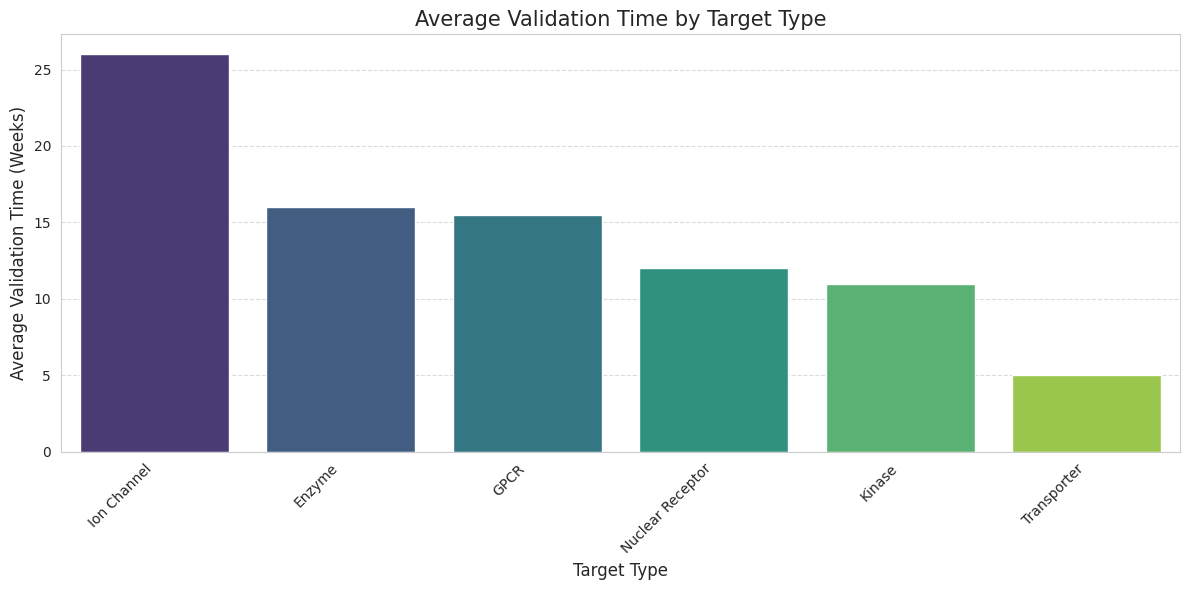

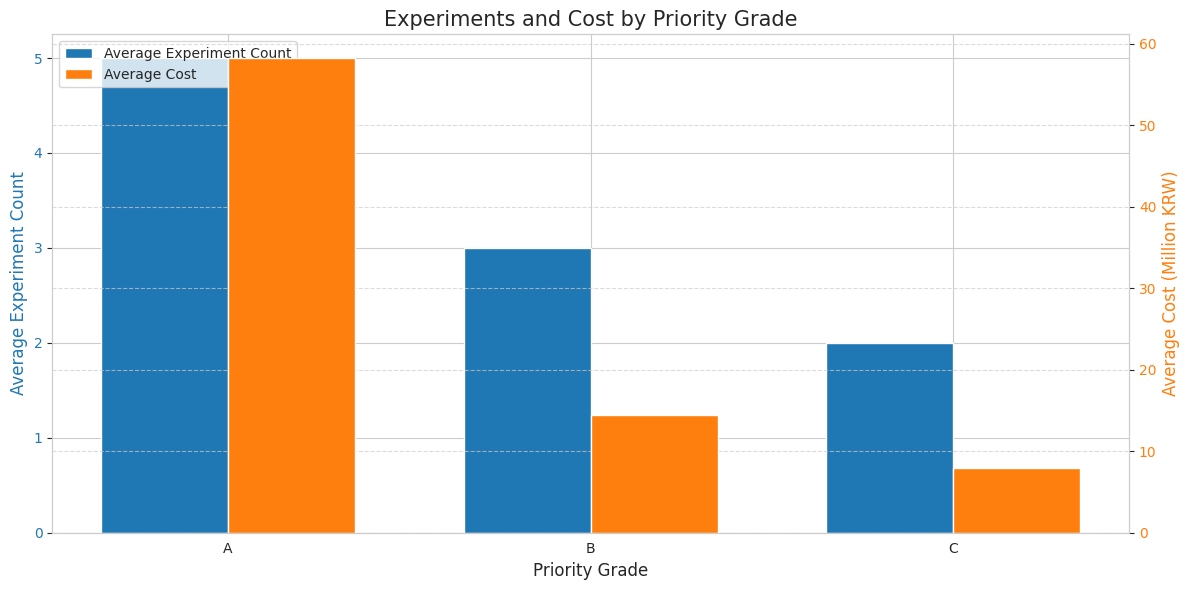


== Priority A Grade Targets (Final Validation Plan) ==

Target: CDK4 (TRG018)
  - Priority Score: 0.67
  - Validation Experiments: Protein Binding Analysis (SPR), Protein Structure Analysis, CRISPR Knockout, Drug Treatment Analysis, Genetically Modified Mouse Model
  - Estimated Time: 26.0 weeks
  - Estimated Cost: 57.0 million KRW

Target: JAK2 (TRG012)
  - Priority Score: 0.67
  - Validation Experiments: Enzyme Activity Analysis, Protein Structure Analysis, CRISPR Knockout, Drug Treatment Analysis, Genetically Modified Mouse Model
  - Estimated Time: 26.0 weeks
  - Estimated Cost: 59.0 million KRW

Target: PIK3CA (TRG002)
  - Priority Score: 0.67
  - Validation Experiments: Protein Binding Analysis (SPR), Protein Structure Analysis, CRISPR Knockout, Drug Treatment Analysis, Genetically Modified Mouse Model
  - Estimated Time: 26.0 weeks
  - Estimated Cost: 57.0 million KRW

Target: BRCA2 (TRG009)
  - Priority Score: 0.66
  - Validation Experiments: Enzyme Activity Analysis, Protein 

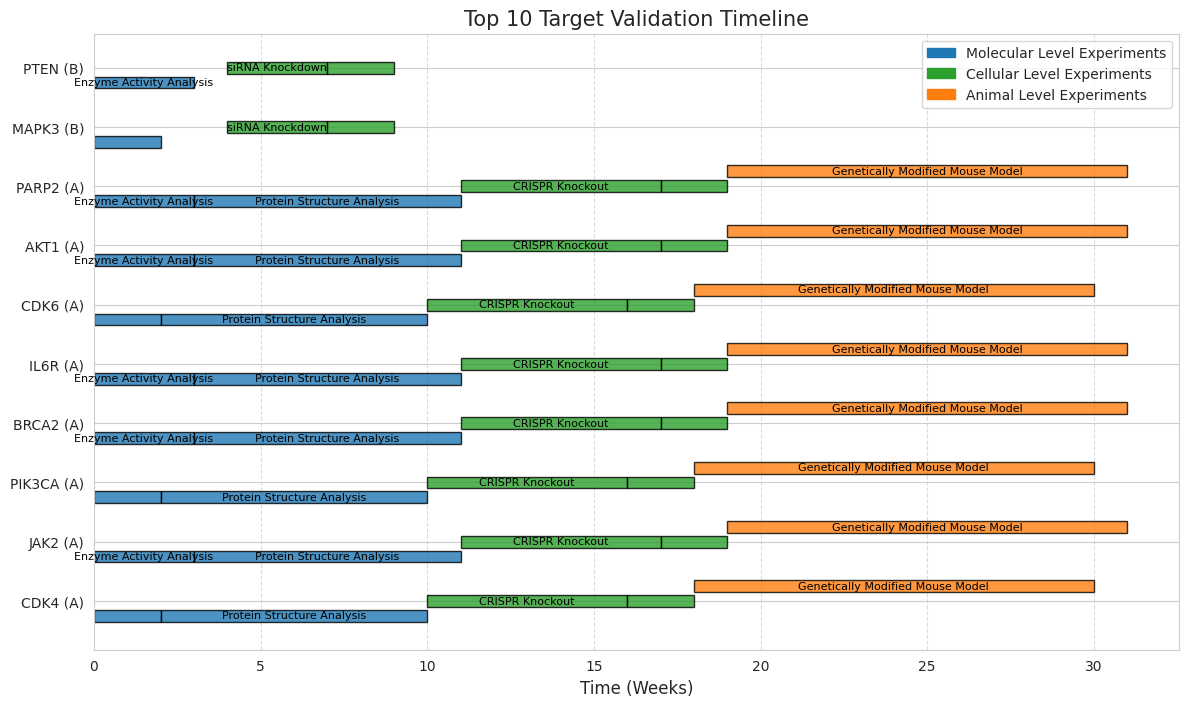

In [ ]:
# 타겟 발굴 시나리오 04: 실험적 검증 계획 수립 실습
# 필요한 라이브러리 설치
# !pip install -q pandas numpy matplotlib seaborn plotly

# 라이브러리 임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch
import plotly.express as px
import plotly.graph_objects as go

# 한글 폰트 설정
import matplotlib.font_manager as fm
import matplotlib as mpl
import platform
import warnings

warnings.filterwarnings('ignore')

# 시각화를 위한 스타일 설정
sns.set_style('whitegrid')

# 경고 메시지 무시 설정
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', module='matplotlib')


print("="*50)
print("Target Validation Planning Exercise")
print("="*50)

# 1. 가상의 타겟 발굴 결과 데이터 생성
def generate_target_candidates():
    """가상의 타겟 후보군 생성 (인실리코 분석 결과 시뮬레이션)"""
    np.random.seed(42)

    # 유전자 이름 생성
    gene_names = [
        "EGFR", "PIK3CA", "BRAF", "PTEN", "AKT1", "KRAS",
        "TP53", "BRCA1", "BRCA2", "MTOR", "JAK1", "JAK2",
        "STAT3", "IL6R", "TNF", "MAPK1", "MAPK3", "CDK4",
        "CDK6", "HDAC1", "HDAC2", "PARP1", "PARP2"
    ]

    # 타겟 ID 생성
    target_ids = [f"TRG{i+1:03d}" for i in range(len(gene_names))]

    # 다양한 특성 생성
    predictive_scores = np.random.normal(0.65, 0.15, len(gene_names))
    predictive_scores = np.clip(predictive_scores, 0.3, 0.95)

    # 타겟 드러그어빌리티 점수 생성
    druggability_scores = np.random.normal(0.6, 0.2, len(gene_names))
    druggability_scores = np.clip(druggability_scores, 0.2, 0.9)

    # 네트워크 중심성 점수 생성
    network_scores = np.random.normal(0.55, 0.2, len(gene_names))
    network_scores = np.clip(network_scores, 0.1, 0.9)

    # 유전적 증거 점수 생성
    genetic_evidence = np.random.normal(0.5, 0.25, len(gene_names))
    genetic_evidence = np.clip(genetic_evidence, 0.1, 0.95)

    # 문헌 증거 점수 생성
    literature_evidence = np.random.normal(0.6, 0.2, len(gene_names))
    literature_evidence = np.clip(literature_evidence, 0.2, 0.9)

    # 기존 약물 여부 생성
    existing_drugs = np.random.choice([True, False], size=len(gene_names), p=[0.3, 0.7])

    # 특허 상태 생성
    patent_status = np.random.choice(['Patented', 'Expired', 'None'], size=len(gene_names), p=[0.4, 0.3, 0.3])

    # 타겟 타입 생성
    target_types = np.random.choice(['Enzyme', 'GPCR', 'Ion Channel', 'Kinase', 'Nuclear Receptor', 'Transporter', 'Other'],
                                   size=len(gene_names),
                                   p=[0.2, 0.1, 0.1, 0.3, 0.1, 0.1, 0.1])

    # 실험 난이도 생성
    exp_difficulty = np.random.choice(['Low', 'Medium', 'High'], size=len(gene_names), p=[0.3, 0.4, 0.3])

    # 실험 비용 생성
    exp_cost = []
    for diff in exp_difficulty:
        if diff == 'Low':
            cost = np.random.randint(10, 30)
        elif diff == 'Medium':
            cost = np.random.randint(25, 50)
        else:
            cost = np.random.randint(45, 80)
        exp_cost.append(cost)

    # 실험 시간 생성 (주 단위)
    exp_time = []
    for diff in exp_difficulty:
        if diff == 'Low':
            time = np.random.randint(1, 4)
        elif diff == 'Medium':
            time = np.random.randint(3, 8)
        else:
            time = np.random.randint(6, 12)
        exp_time.append(time)

    # 데이터프레임 생성
    df = pd.DataFrame({
        'Target_ID': target_ids,
        'Gene_Name': gene_names,
        'Predictive_Score': predictive_scores,
        'Druggability_Score': druggability_scores,
        'Network_Score': network_scores,
        'Genetic_Evidence': genetic_evidence,
        'Literature_Evidence': literature_evidence,
        'Existing_Drugs': existing_drugs,
        'Patent_Status': patent_status,
        'Target_Type': target_types,
        'Exp_Difficulty': exp_difficulty,
        'Exp_Cost': exp_cost,
        'Exp_Time': exp_time
    })

    return df

# 2. 타겟 검증 우선순위 평가 함수
def evaluate_validation_priority(df):
    """타겟 검증 우선순위 평가"""
    df_evaluated = df.copy()

    # 종합 점수 계산
    df_evaluated['Confidence_Score'] = (
        0.3 * df_evaluated['Predictive_Score'] +
        0.2 * df_evaluated['Druggability_Score'] +
        0.15 * df_evaluated['Network_Score'] +
        0.2 * df_evaluated['Genetic_Evidence'] +
        0.15 * df_evaluated['Literature_Evidence']
    )

    # 실험 효율성 점수 계산 (비용과 시간 고려)
    # 비용과 시간을 0-1 범위로 정규화 (낮을수록 좋음)
    max_cost = df_evaluated['Exp_Cost'].max()
    max_time = df_evaluated['Exp_Time'].max()

    df_evaluated['Cost_Score'] = 1 - (df_evaluated['Exp_Cost'] / max_cost)
    df_evaluated['Time_Score'] = 1 - (df_evaluated['Exp_Time'] / max_time)

    # 실험 효율성 점수
    df_evaluated['Efficiency_Score'] = 0.6 * df_evaluated['Cost_Score'] + 0.4 * df_evaluated['Time_Score']

    # 혁신성 점수 (기존 약물이 없고 특허가 없는 경우 높은 점수)
    df_evaluated['Innovation_Score'] = 0.0

    for idx, row in df_evaluated.iterrows():
        if not row['Existing_Drugs'] and row['Patent_Status'] == 'None':
            df_evaluated.at[idx, 'Innovation_Score'] = 1.0
        elif not row['Existing_Drugs'] and row['Patent_Status'] == 'Expired':
            df_evaluated.at[idx, 'Innovation_Score'] = 0.7
        elif row['Existing_Drugs'] and row['Patent_Status'] == 'None':
            df_evaluated.at[idx, 'Innovation_Score'] = 0.5
        elif not row['Existing_Drugs'] and row['Patent_Status'] == 'Patented':
            df_evaluated.at[idx, 'Innovation_Score'] = 0.3
        else:
            df_evaluated.at[idx, 'Innovation_Score'] = 0.1

    # 종합 우선순위 점수
    df_evaluated['Priority_Score'] = (
        0.5 * df_evaluated['Confidence_Score'] +
        0.3 * df_evaluated['Efficiency_Score'] +
        0.2 * df_evaluated['Innovation_Score']
    )

    # 우선순위 등급 부여
    df_evaluated['Priority_Rank'] = df_evaluated['Priority_Score'].rank(ascending=False)

    # 우선순위 등급을 A, B, C로 범주화
    df_evaluated['Priority_Grade'] = 'C'
    high_threshold = df_evaluated['Priority_Score'].quantile(0.67)
    medium_threshold = df_evaluated['Priority_Score'].quantile(0.33)

    df_evaluated.loc[df_evaluated['Priority_Score'] >= high_threshold, 'Priority_Grade'] = 'A'
    df_evaluated.loc[(df_evaluated['Priority_Score'] >= medium_threshold) &
                    (df_evaluated['Priority_Score'] < high_threshold), 'Priority_Grade'] = 'B'

    return df_evaluated

# 3. 검증 실험 유형별 할당 함수
def assign_validation_experiments(df):
    """타겟별 검증 실험 유형 할당"""
    df_assigned = df.copy()

    # 실험 유형 리스트
    molecular_experiments = [
        "Protein Binding Analysis (SPR)",
        "Enzyme Activity Analysis",
        "Protein Structure Analysis"
    ]

    cellular_experiments = [
        "siRNA Knockdown",
        "CRISPR Knockout",
        "Overexpression Analysis",
        "Drug Treatment Analysis"
    ]

    animal_experiments = [
        "Genetically Modified Mouse Model",
        "Drug-treated Animal Model",
        "PDX Model"
    ]

    # 타겟 유형과 우선순위에 따른 실험 할당
    for idx, row in df_assigned.iterrows():
        experiments = []

        # 분자 수준 실험 할당
        if row['Target_Type'] in ['Enzyme', 'Kinase']:
            experiments.append(molecular_experiments[1])  # Enzyme Activity Analysis
        else:
            experiments.append(molecular_experiments[0])  # Protein Binding Analysis

        # 중요 타겟은 구조 분석 추가
        if row['Priority_Grade'] == 'A':
            experiments.append(molecular_experiments[2])  # Protein Structure Analysis

        # 세포 수준 실험 할당
        if row['Priority_Grade'] == 'A':
            # A 등급은 더 많은 세포 실험
            experiments.append(cellular_experiments[1])  # CRISPR Knockout
            experiments.append(cellular_experiments[3])  # Drug Treatment Analysis
        elif row['Priority_Grade'] == 'B':
            # B 등급은 기본 세포 실험
            experiments.append(cellular_experiments[0])  # siRNA Knockdown
            experiments.append(cellular_experiments[3])  # Drug Treatment Analysis
        else:
            # C 등급은 필수 세포 실험만
            experiments.append(cellular_experiments[0])  # siRNA Knockdown

        # 동물 수준 실험 할당
        if row['Priority_Grade'] == 'A':
            # A 등급은 포괄적 동물 모델
            if row['Existing_Drugs']:
                experiments.append(animal_experiments[1])  # Drug-treated Animal Model
            else:
                experiments.append(animal_experiments[0])  # Genetically Modified Mouse Model
        elif row['Priority_Grade'] == 'B' and row['Confidence_Score'] > 0.7:
            # 높은 신뢰도의 B 등급은 동물 모델 사용
            experiments.append(animal_experiments[1])  # Drug-treated Animal Model

        df_assigned.at[idx, 'Validation_Experiments'] = ', '.join(experiments)
        df_assigned.at[idx, 'Experiment_Count'] = len(experiments)

    return df_assigned

# 4. 검증 실험 타임라인 및 자원 계획 생성
def create_validation_timeline(df):
    """타겟 검증 실험 타임라인 생성"""
    df_timeline = df.copy()

    # 실험별 기본 소요 시간 (주 단위)
    experiment_time = {
        "Protein Binding Analysis (SPR)": 2,
        "Enzyme Activity Analysis": 3,
        "Protein Structure Analysis": 8,
        "siRNA Knockdown": 3,
        "CRISPR Knockout": 6,
        "Overexpression Analysis": 4,
        "Drug Treatment Analysis": 2,
        "Genetically Modified Mouse Model": 12,
        "Drug-treated Animal Model": 8,
        "PDX Model": 14
    }

    # 실험별 비용 (단위: 100만원)
    experiment_cost = {
        "Protein Binding Analysis (SPR)": 3,
        "Enzyme Activity Analysis": 5,
        "Protein Structure Analysis": 15,
        "siRNA Knockdown": 4,
        "CRISPR Knockout": 8,
        "Overexpression Analysis": 5,
        "Drug Treatment Analysis": 6,
        "Genetically Modified Mouse Model": 25,
        "Drug-treated Animal Model": 18,
        "PDX Model": 30
    }

    # 각 타겟별 총 실험 시간 및 비용 계산
    for idx, row in df_timeline.iterrows():
        experiments = row['Validation_Experiments'].split(', ')

        # 병렬 진행 가능한 실험을 고려한 총 시간 계산
        molecular_time = 0
        cellular_time = 0
        animal_time = 0

        total_cost = 0

        for exp in experiments:
            if exp in ["Protein Binding Analysis (SPR)", "Enzyme Activity Analysis", "Protein Structure Analysis"]:
                molecular_time = max(molecular_time, experiment_time[exp])
            elif exp in ["siRNA Knockdown", "CRISPR Knockout", "Overexpression Analysis", "Drug Treatment Analysis"]:
                cellular_time = max(cellular_time, experiment_time[exp])
            else:
                animal_time = max(animal_time, experiment_time[exp])

            total_cost += experiment_cost[exp]

        # 단계적 진행을 고려한 총 시간 (분자 -> 세포 -> 동물)
        total_time = molecular_time + cellular_time + animal_time

        df_timeline.at[idx, 'Total_Validation_Time'] = total_time
        df_timeline.at[idx, 'Total_Validation_Cost'] = total_cost

    return df_timeline

# 5. 검증 계획 시각화
def visualize_validation_plan(df):
    """타겟 검증 계획 시각화"""
    # 1. 우선순위 분포 시각화
    plt.figure(figsize=(12, 6))
    sns.scatterplot(
        data=df,
        x='Confidence_Score',
        y='Efficiency_Score',
        size='Innovation_Score',
        hue='Priority_Grade',
        palette={'A': '#ff7f0e', 'B': '#2ca02c', 'C': '#1f77b4'},
        sizes=(50, 200),
        alpha=0.7
    )

    plt.title('Target Validation Priority Assessment', fontsize=15)
    plt.xlabel('Confidence Score (Prediction Reliability)', fontsize=12)
    plt.ylabel('Efficiency Score (Experimental Efficiency)', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)

    # 범례 추가
    handles, labels = plt.gca().get_legend_handles_labels()
    priority_legend = plt.legend(handles[:3], labels[:3], title='Priority Grade', loc='upper left')
    plt.gca().add_artist(priority_legend)

    # 크기에 대한 범례 추가
    size_handles = [
        plt.scatter([], [], s=50, color='gray', alpha=0.7),
        plt.scatter([], [], s=125, color='gray', alpha=0.7),
        plt.scatter([], [], s=200, color='gray', alpha=0.7)
    ]
    plt.legend(size_handles, ['Low', 'Medium', 'High'], title='Innovation Score', loc='upper right')

    plt.tight_layout()
    plt.savefig('validation_priority.png', dpi=300)
    plt.show()

    # 2. 타겟 유형별 평균 검증 시간 시각화
    plt.figure(figsize=(12, 6))
    type_time = df.groupby('Target_Type')['Total_Validation_Time'].mean().sort_values(ascending=False)

    sns.barplot(x=type_time.index, y=type_time.values, palette='viridis')
    plt.title('Average Validation Time by Target Type', fontsize=15)
    plt.xlabel('Target Type', fontsize=12)
    plt.ylabel('Average Validation Time (Weeks)', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig('validation_time_by_type.png', dpi=300)
    plt.show()

    # 3. 우선순위 등급별 실험 수 및 비용 비교
    fig, ax1 = plt.subplots(figsize=(12, 6))

    grade_exp = df.groupby('Priority_Grade')['Experiment_Count'].mean()
    grade_cost = df.groupby('Priority_Grade')['Total_Validation_Cost'].mean()

    x = np.arange(len(grade_exp.index))
    width = 0.35

    # 실험 수 막대 그래프
    ax1.bar(x - width/2, grade_exp.values, width, color='#1f77b4', label='Average Experiment Count')
    ax1.set_xlabel('Priority Grade', fontsize=12)
    ax1.set_ylabel('Average Experiment Count', fontsize=12, color='#1f77b4')
    ax1.tick_params(axis='y', labelcolor='#1f77b4')

    # 두 번째 y축 생성
    ax2 = ax1.twinx()
    ax2.bar(x + width/2, grade_cost.values, width, color='#ff7f0e', label='Average Cost')
    ax2.set_ylabel('Average Cost (Million KRW)', fontsize=12, color='#ff7f0e')
    ax2.tick_params(axis='y', labelcolor='#ff7f0e')

    plt.title('Experiments and Cost by Priority Grade', fontsize=15)
    plt.xticks(x, grade_exp.index)

    # 두 개의 범례 합치기
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, ['Average Experiment Count', 'Average Cost'], loc='upper left')

    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig('validation_cost_by_grade.png', dpi=300)
    plt.show()

    # 4. 검증 실험 타임라인 시각화
    top_targets = df.sort_values('Priority_Score', ascending=False).head(10)

    # 간트 차트 데이터 준비
    molecular_exps = ["Protein Binding Analysis (SPR)", "Enzyme Activity Analysis", "Protein Structure Analysis"]
    cellular_exps = ["siRNA Knockdown", "CRISPR Knockout", "Overexpression Analysis", "Drug Treatment Analysis"]
    animal_exps = ["Genetically Modified Mouse Model", "Drug-treated Animal Model", "PDX Model"]

    experiment_time = {
        "Protein Binding Analysis (SPR)": 2,
        "Enzyme Activity Analysis": 3,
        "Protein Structure Analysis": 8,
        "siRNA Knockdown": 3,
        "CRISPR Knockout": 6,
        "Overexpression Analysis": 4,
        "Drug Treatment Analysis": 2,
        "Genetically Modified Mouse Model": 12,
        "Drug-treated Animal Model": 8,
        "PDX Model": 14
    }

    # 간트 차트 생성
    fig, ax = plt.subplots(figsize=(14, 8))

    y_labels = []
    y_ticks = []

    for i, (idx, target) in enumerate(top_targets.iterrows()):
        y_pos = i * 4  # 각 타겟 사이의 간격
        y_ticks.append(y_pos + 1)  # 타겟 이름 위치
        y_labels.append(f"{target['Gene_Name']} ({target['Priority_Grade']})")

        exp_list = target['Validation_Experiments'].split(', ')
        current_pos = 0  # 실험 시작 위치

        for exp in exp_list:
            duration = experiment_time[exp]

            # 실험 유형에 따른 색상 설정
            if exp in molecular_exps:
                color = '#1f77b4'  # 분자 수준 실험
                y_offset = 0
            elif exp in cellular_exps:
                color = '#2ca02c'  # 세포 수준 실험
                y_offset = 1
                current_pos = max(current_pos, 4)  # 분자 실험 후 시작
            else:
                color = '#ff7f0e'  # 동물 수준 실험
                y_offset = 2
                current_pos = max(current_pos, 12)  # 세포 실험 후 시작

            # 실험 블록 그리기
            ax.barh(y_pos + y_offset, duration, left=current_pos, height=0.8,
                   color=color, alpha=0.8, edgecolor='black', linewidth=1)

            # 실험 이름 추가
            if duration > 2:  # 충분히 넓은 경우에만 이름 표시
                ax.text(current_pos + duration/2, y_pos + y_offset, exp.split('(')[0],
                       ha='center', va='center', color='black', fontsize=8)

            # 다음 병렬 실험을 위한 위치 업데이트
            if exp in molecular_exps:
                molecular_end = current_pos + duration
            elif exp in cellular_exps:
                cellular_end = current_pos + duration

            current_pos += duration

    # 차트 꾸미기
    ax.set_yticks(y_ticks)
    ax.set_yticklabels(y_labels)
    ax.set_xlabel('Time (Weeks)', fontsize=12)
    ax.set_title('Top 10 Target Validation Timeline', fontsize=15)
    ax.grid(True, axis='x', linestyle='--', alpha=0.7)

    # 범례 추가
    legend_patches = [
        Patch(color='#1f77b4', label='Molecular Level Experiments'),
        Patch(color='#2ca02c', label='Cellular Level Experiments'),
        Patch(color='#ff7f0e', label='Animal Level Experiments')
    ]
    ax.legend(handles=legend_patches, loc='upper right')

# 메인 실행 코드
if __name__ == "__main__":
    # 1. 타겟 후보 데이터 생성
    target_df = generate_target_candidates()
    print("\nGenerated Target Candidate Data:")
    print(target_df[['Target_ID', 'Gene_Name', 'Predictive_Score', 'Druggability_Score']].head())

    # 2. 타겟 검증 우선순위 평가
    evaluated_df = evaluate_validation_priority(target_df)
    print("\nTarget Priority Assessment Results:")
    print(evaluated_df[['Target_ID', 'Gene_Name', 'Confidence_Score', 'Efficiency_Score',
                         'Innovation_Score', 'Priority_Score', 'Priority_Grade']].head())

    # 3. 검증 실험 할당
    assigned_df = assign_validation_experiments(evaluated_df)
    print("\nValidation Experiment Assignment Results:")
    print(assigned_df[['Target_ID', 'Gene_Name', 'Priority_Grade', 'Validation_Experiments']].head())

    # 4. 검증 타임라인 및 자원 계획 생성
    timeline_df = create_validation_timeline(assigned_df)
    print("\nValidation Timeline and Cost by Target:")
    print(timeline_df[['Target_ID', 'Gene_Name', 'Priority_Grade', 'Total_Validation_Time', 'Total_Validation_Cost']].head(10))

    # 5. 종합 검증 계획 시각화
    visualize_validation_plan(timeline_df)

    # 6. 우선순위 A 등급 타겟 출력
    priority_a = timeline_df[timeline_df['Priority_Grade'] == 'A'].sort_values('Priority_Score', ascending=False)
    print("\n== Priority A Grade Targets (Final Validation Plan) ==")
    for _, target in priority_a.iterrows():
        print(f"\nTarget: {target['Gene_Name']} ({target['Target_ID']})")
        print(f"  - Priority Score: {target['Priority_Score']:.2f}")
        print(f"  - Validation Experiments: {target['Validation_Experiments']}")
        print(f"  - Estimated Time: {target['Total_Validation_Time']} weeks")
        print(f"  - Estimated Cost: {target['Total_Validation_Cost']} million KRW")

    print("\n==== Target Validation Planning Completed ====")
